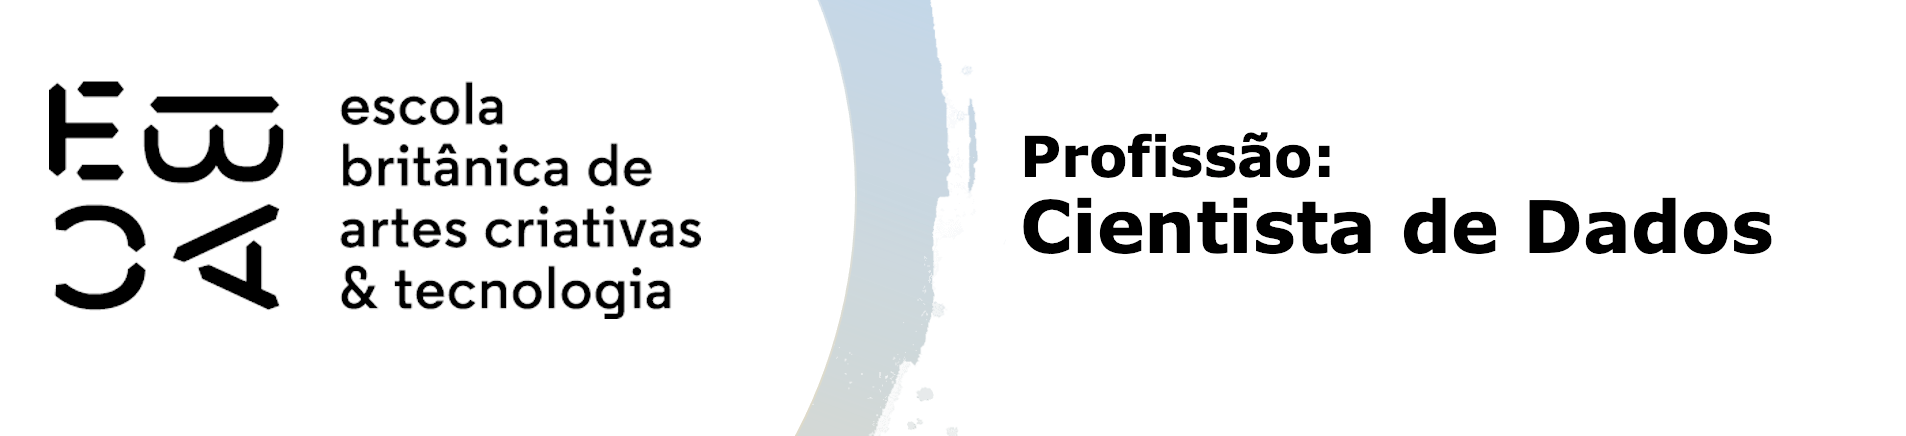

_____

### Aluno: Victor Resende

_____

# Métodos hierárquicos de agrupamento - Tarefa

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as shc

import warnings
# Suprimindo avisos específicos
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")
warnings.filterwarnings("ignore", message="No artists with labels found to put in legend")


## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

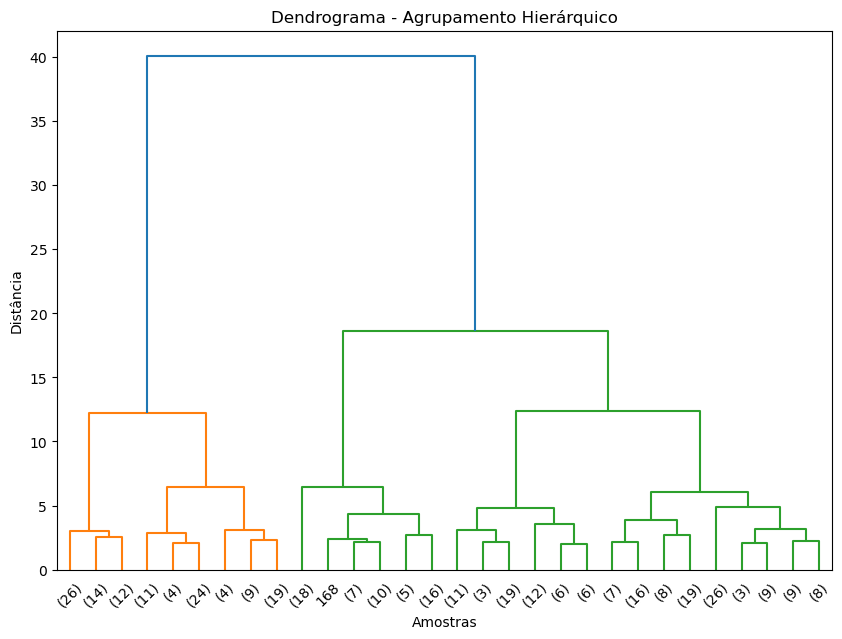

In [7]:
# 1. Carregando os dados e selecionando variáveis quantitativas:
peng = sns.load_dataset('penguins')
peng.index.name = 'id'
peng_num = peng.select_dtypes(include='number').dropna()  # Selecionar variáveis numéricas e eliminar valores faltantes
peng_num.reset_index(drop=True, inplace=True)  # Resetando o índice após remoção de valores faltantes

# 2. Padronizando as variáveis para média zero e desvio padrão 1:
scaler = StandardScaler()
peng_num_scaled = scaler.fit_transform(peng_num)

# 3. Agrupamento hierárquico:
linkage_matrix = linkage(peng_num_scaled, method='ward')

# 4. Plotando o Dendrograma:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=peng_num.index, truncate_mode='lastp', p=30)
plt.title('Dendrograma - Agrupamento Hierárquico')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

# 5. Criando 3 clusters e adicionar a classificação aos dados filtrados:
peng_num['Cluster'] = fcluster(linkage_matrix, t=3, criterion='maxclust')


## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [16]:
# Garantindo que o índice de `peng_with_clusters` e `peng_num` estejam alinhados corretamente:
peng_with_clusters = peng.dropna(subset=peng.select_dtypes(include='number').columns).copy()  # Remover apenas as linhas com nulos nas variáveis numéricas
peng_with_clusters['Cluster'] = peng_num['Cluster'].values  # Adicionar o cluster ao DataFrame original

# 1. Quantidade de pinguins de cada espécie em cada grupo:
species_counts = peng_with_clusters.groupby(['Cluster', 'species']).size().unstack(fill_value=0)
print("Quantidade de pinguins de cada espécie em cada grupo:")
species_counts


Quantidade de pinguins de cada espécie em cada grupo:


species,Adelie,Chinstrap,Gentoo
Cluster,,,
1,0,0,123
2,0,57,0
3,151,11,0


In [18]:
# 2. Descrição estatística das variáveis quantitativas para cada grupo:
group_stats = peng_with_clusters.groupby('Cluster').describe()
print("\nDescrição estatística das variáveis quantitativas de cada grupo:")
group_stats


Descrição estatística das variáveis quantitativas de cada grupo:


bill_length_mm                                                      \
                 count       mean       std   min   25%   50%    75%   max   
Cluster                                                                      
1                123.0  47.504878  3.081857  40.9  45.3  47.3  49.55  59.6   
2                 57.0  49.752632  2.710107  45.2  47.5  50.2  51.30  58.0   
3                162.0  39.150000  2.936560  32.1  37.0  39.0  41.10  46.9   

        bill_depth_mm             ... flipper_length_mm        body_mass_g  \
                count       mean  ...               75%    max       count   
Cluster                           ...                                        
1               123.0  14.982114  ...            221.00  231.0       123.0   
2                57.0  18.601754  ...            201.00  212.0        57.0   
3               162.0  18.287654  ...            194.75  210.0       162.0   

                                                                            
                mean         std     min      25%     50%      75%     max  
Cluster                                                                     
1        5076.016260  504.116237  3950.0  4700.00  5000.0  5500.00  6300.0  
2        3810.087719  338.255096  3250.0  3600.00  3775.0  4000.00  4800.0  
3        3675.771605  461.704434  2700.0  3331.25  3612.5  3968.75  4775.0  

[3 rows x 32 columns]

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [20]:
# Criando 5 clusters com base na estrutura observada no dendrograma:
peng_num['Cluster'] = fcluster(linkage_matrix, t=5, criterion='maxclust')

# Garantindo a correspondência dos clusters com o DataFrame original:
peng_with_clusters = peng.dropna(subset=peng.select_dtypes(include='number').columns).copy()  # Removendo apenas valores nulos nas variáveis numéricas
peng_with_clusters['Cluster'] = peng_num['Cluster'].values  # Adicionando a coluna de cluster ao DataFrame original

# Quantidade de pinguins de cada espécie em cada grupo
species_counts = peng_with_clusters.groupby(['Cluster', 'species']).size().unstack(fill_value=0)
print("Quantidade de pinguins de cada espécie em cada grupo:")
print(species_counts)

# Quantidade de pinguins de cada espécie e sexo em cada grupo
species_sex_counts = peng_with_clusters.groupby(['Cluster', 'species', 'sex']).size().unstack(fill_value=0)
print("\nQuantidade de pinguins de cada espécie e sexo em cada grupo:")
print(species_sex_counts)

# Descrição estatística das variáveis quantitativas de cada grupo
group_stats = peng_with_clusters.groupby('Cluster').describe()
print("\nDescrição estatística das variáveis quantitativas de cada grupo:")
print(group_stats)


Quantidade de pinguins de cada espécie em cada grupo:
species  Adelie  Chinstrap  Gentoo
Cluster                           
1             0          0      52
2             0          0      71
3             0         57       0
4            54          3       0
5            97          8       0

Quantidade de pinguins de cada espécie e sexo em cada grupo:
sex                Female  Male
Cluster species                
1       Gentoo         49     0
2       Gentoo          9    61
3       Chinstrap      23    34
4       Adelie          1    52
        Chinstrap       3     0
5       Adelie         72    21
        Chinstrap       8     0

Descrição estatística das variáveis quantitativas de cada grupo:
        bill_length_mm                                                        \
                 count       mean       std   min     25%   50%    75%   max   
Cluster                                                                        
1                 52.0  45.200000  1.866422  

### Visualizando os dados para uma melhor análise:

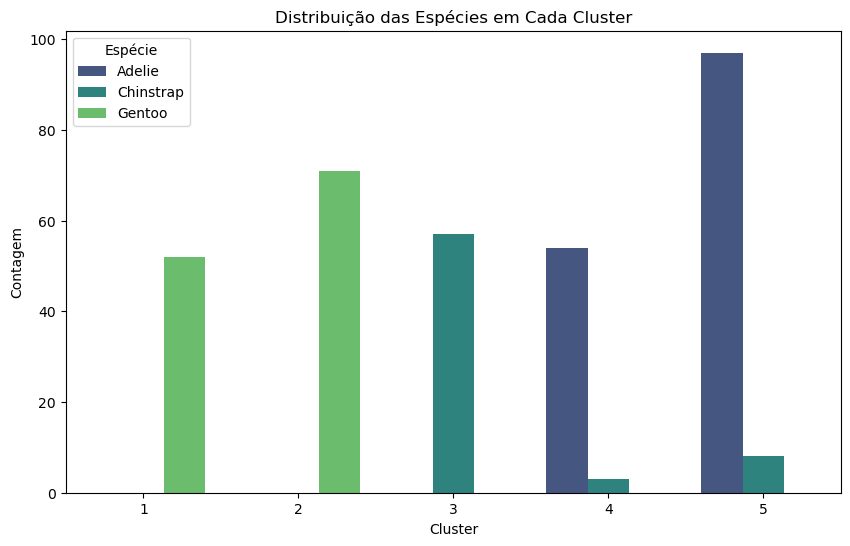

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


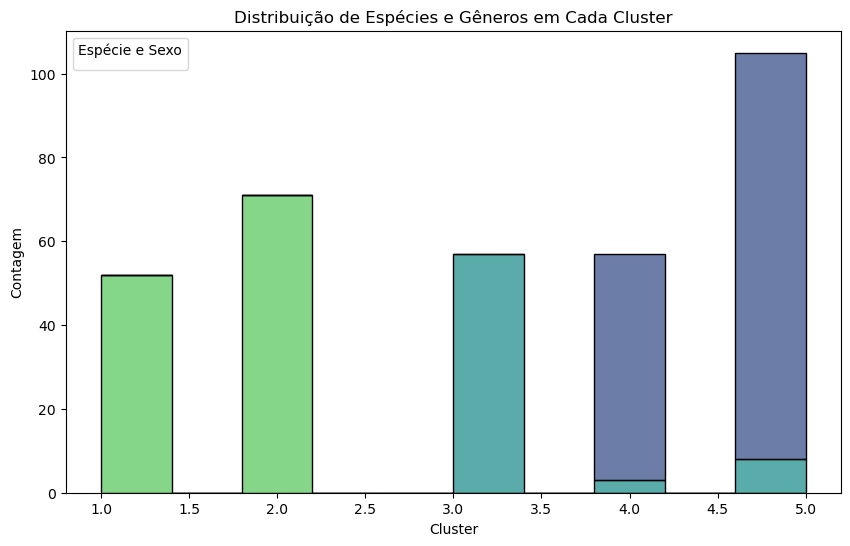

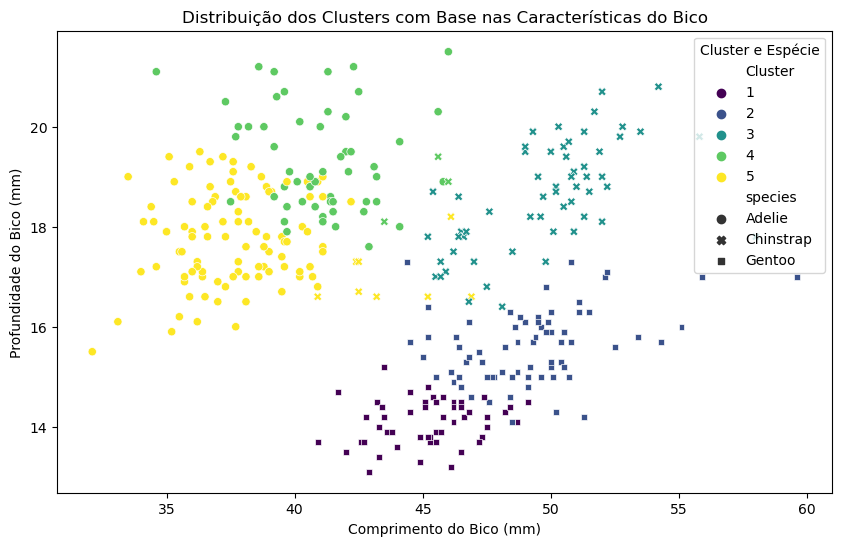

In [37]:
# 1. Gráfico de barras para contagem de espécies em cada cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=peng_with_clusters, x='Cluster', hue='species', palette='viridis')
plt.title('Distribuição das Espécies em Cada Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Espécie')
plt.show()

# 2. Gráfico de barras empilhadas para contagem de espécies e sexos em cada cluster
plt.figure(figsize=(10, 6))
sns.histplot(
    data=peng_with_clusters, x='Cluster', hue='species', multiple="stack",
    palette='viridis', kde=False, stat="count"
)
plt.title('Distribuição de Espécies e Gêneros em Cada Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
# Adicionando a legenda apenas se houver rótulos definidos
if peng_with_clusters['species'].notna().any():
    plt.legend(title='Espécie e Sexo')
plt.show()

# 3. Gráfico de dispersão das características físicas principais (por exemplo, comprimento e profundidade do bico)
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=peng_with_clusters, x='bill_length_mm', y='bill_depth_mm', hue='Cluster', style='species', palette='viridis')
plt.title('Distribuição dos Clusters com Base nas Características do Bico')
plt.xlabel('Comprimento do Bico (mm)')
plt.ylabel('Profundidade do Bico (mm)')
# Adicionando a legenda apenas se houver rótulos válidos
handles, labels = scatter.get_legend_handles_labels()
if any(labels):
    plt.legend(title='Cluster e Espécie')
plt.show()


- **Percebemos que o agrupamento capturou padrões naturais de dados, como no caso comprimento e da profundidade do bico dos pinguins.**
- **Aqui, notamos características semelhantes e dimorfismo entre as espécies.**
- **Observamos também a distribuição e a difrenciação das espécies em cada cluster.**

_____